### Deep RNNs

Deep RNNs are also known as stacked RNNs

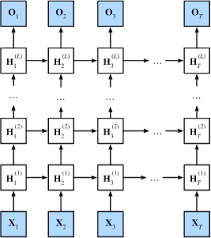

### Why and When to use DeepRNNs

We should use DeepRNN where we have to capture complex patterns between the data

1. Hierarchial Representation
  - Words makes sentences and sentences makes paragraphs this is a hierarchy
  - Similarly initial layers of RNN for let's say sentiment analysis will try to give output based on words, the more middle layers will try to give output by understanding the meaning of the sentence and the final layers of RNNs will try to give output by understanding the meaning of the entire paragraph
  - Deep RNNs are able to capture hierarcial representation

2. Customiztion for Advanced Tasks

### When to use DeepRNNs

1. Complex task (eg. speeh recognition, machine translation)
2. When you have large dataset
3. If you have sufficiant computation and computational power
4. When you are not satisfied by simpler models

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

In [6]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = 10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
model = Sequential([
    Embedding(10000, 32),
    SimpleRNN(5, return_sequences=True),
    SimpleRNN(5),
    Dense(1, activation = 'sigmoid')
])

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [12]:
max_length = 50
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)

In [13]:
model.fit(X_train, y_train, epochs = 5, validation_data = (X_test, y_test))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 32ms/step - accuracy: 0.6348 - loss: 0.6346 - val_accuracy: 0.7465 - val_loss: 0.5261
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.7978 - loss: 0.4403 - val_accuracy: 0.7629 - val_loss: 0.5046
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - accuracy: 0.8697 - loss: 0.3182 - val_accuracy: 0.7690 - val_loss: 0.5149
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - accuracy: 0.9120 - loss: 0.2394 - val_accuracy: 0.7634 - val_loss: 0.5721
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 34ms/step - accuracy: 0.9386 - loss: 0.1752 - val_accuracy: 0.7552 - val_loss: 0.6291


### You can also do DeepLSTMs and DeepGRUs